![img](image.png)
<H1>Projet Analyse de Données<H1>

## Contexte

Le moto GP est une compétition de moto devenu de nos jours très célèbre et de plus en plus regardé dans le monde. De grand cnom ont marqué l'histoire de ce sport et plusieurs personnes pensent que Valentino Rossi est le meilleur pilote de l'histoire de ce sport. 

![img](rossi.jpg)

La question qui prévaut est donc celle de savoir : **Rossi est il le pilote le plus titré de l'histoire du moto GP?**

In [2]:
import pandas as pd
import numpy as np
import plotly as plot
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

### Chargement de données 
Les données sont dans un tableau au format CSV(Comma Separeted Values) :

In [3]:
gp = pd.read_csv('data/riders-info.csv')

*Observons les résultats que l'on obtient*

In [5]:
gp.head()

,Riders All Time in All Classes,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0
4,HAILWOOD Mike,76,25.0,11.0,NaN,79.0,9.0


In [6]:
gp.shape

(368, 7)

In [7]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Riders All Time in All Classes   368 non-null    object 
 1   Victories                        368 non-null    int64  
 2   2nd places                       339 non-null    float64
 3   3rd places                       320 non-null    float64
 4   Pole positions from '74 to 2022  226 non-null    float64
 5   Race fastest lap to 2022         295 non-null    float64
 6   World Championships              114 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


Les colonnes sont:
*   Riders All Time in All Classes : Pilotes de tous les temps dans toutes les catégories
*   Victories : nombre de victoire
*   2nd places : deuxième places
*   3rd places : troisièmes places
*   Pole position from '74 to 2022' : Pole position de '74 à 2022'
*   Race fastest lap to 2022 : Tour le plus rapide de la course jusqu’en 2022
*   World Championships : Championts du monde

### Nombre de valeurs NaN du tableau

In [8]:
gp.isnull().sum()

Riders All Time in All Classes       0
Victories                            0
2nd places                          29
3rd places                          48
Pole positions from '74 to 2022    142
Race fastest lap to 2022            73
World Championships                254
dtype: int64

In [9]:
gp.rename(columns={"Riders All Time in All Classes":"Noms"}, inplace=True)
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Noms                             368 non-null    object 
 1   Victories                        368 non-null    int64  
 2   2nd places                       339 non-null    float64
 3   3rd places                       320 non-null    float64
 4   Pole positions from '74 to 2022  226 non-null    float64
 5   Race fastest lap to 2022         295 non-null    float64
 6   World Championships              114 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


Plusieurs champs ont des valeurs manquantes;
### nous allons les remplacer par 0 étant donné que ce sont des valeurs numériques

In [10]:
gp1 = gp.fillna(0)

In [11]:
gp1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Victories,368.0,8.679348,14.460711,1.0,1.0,4.0,9.25,122.0
2nd places,368.0,7.826087,9.022054,0.0,2.0,5.0,10.00,67.0
3rd places,368.0,7.016304,7.071820,0.0,2.0,5.0,10.00,53.0
Pole positions from '74 to 2022,368.0,6.000000,11.095572,0.0,0.0,1.0,7.00,90.0
Race fastest lap to 2022,368.0,7.649457,13.038800,0.0,1.0,3.0,9.00,117.0
World Championships,368.0,0.739130,1.741430,0.0,0.0,0.0,1.00,15.0


Affichons le graphe qui represente les pilotes et leurs victoire:
Nous remarquons que le pilote  Valentino Rossi qui aura le code 1 a moins de victoire que le pilote au code 0

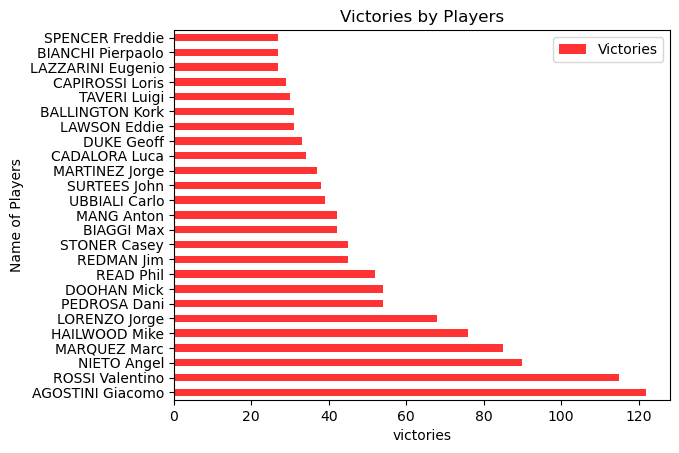

In [12]:
gp1.head(25).plot.barh(x="Noms",y="Victories",color="red",alpha=0.80);plt.xlabel("victories");plt.ylabel("Name of Players");
plt.title("Victories by Players");plt.show()

In [ ]:
gp1.plot.box()

### graphe qui montre le nombre de championat du monde remporté

Pilotes avec plus de 5 victoires: Giacomo Agostini reste toujours le plus de victoires

In [ ]:
gp1[gp1["World Championships"]>5].plot(x="Noms",y="World Championships",kind="bar",color="green")
plt.xlabel("Nom des pilotes")
plt.ylabel("No . of world campionships")
plt.title("No. of world title won by players",fontsize=10,pad=5)
plt.show()

Les coureurs qui ont plusieurs podiums tels que champion, deuxième et troisième place. Valentino Rossi est le pilote avec le plus grand nombre de podiums par rapport à Giacomo Agostini.

In [ ]:
df_mt=gp1.drop(columns=["Pole positions from '74 to 2022","Race fastest lap to 2022","World Championships"])

df_mt.head(10).plot(x='Noms', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

In [ ]:
total = sum(gp1["Victories"])
data = [sum(gp1["Victories"].head(10)),sum(gp1["Victories"])-sum(gp1["Victories"].head(10))]

sizes = data
labels = ['top 10 riders victories', 'Other riders victories']
colors = ['blue', 'red']

explode = (0.05, 0.05)

# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,autopct='%1.1f%%', pctdistance=0.85,explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Victories of top 10 players vs other Riders')

plt.legend(labels, loc="upper left", title="Comparision of top players vs others")

plt.show()

## Correlation

In [ ]:
corr=gp1.corr()
corr.style.highlight_max(color="green",axis=1)

### Heatmap

In [ ]:
sn.heatmap(corr)

<Figure size 640x480 with 0 Axes>

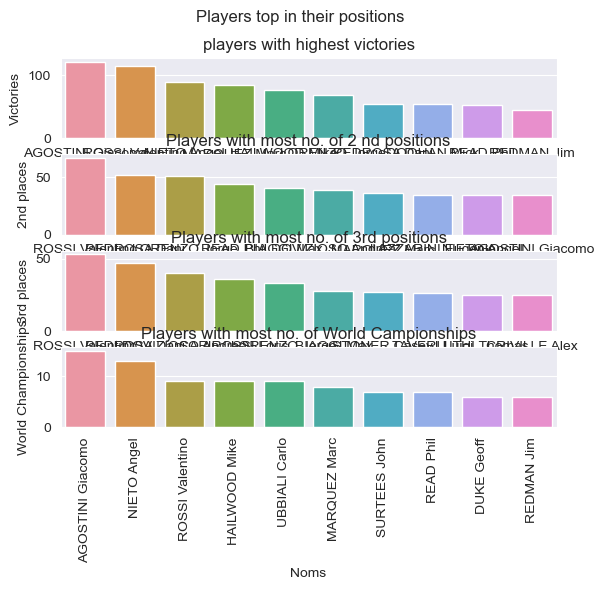

In [22]:
plt.figure(facecolor="olive",edgecolor="green")
sn.set_palette( 'inferno_r')
sn.set_style("darkgrid")
df2=gp1.sort_values(by="Victories",ascending=False).head(10)
df3=gp1.sort_values(by="2nd places",ascending=False).head(10)
df4=gp1.sort_values(by="3rd places",ascending=False).head(10)
df5=gp1.sort_values(by="World Championships",ascending=False).head(10)
fig, axes = plt.subplots(4,1)
fig.suptitle('Players top in their positions')


sn.barplot(ax=axes[0], x=df2.Noms, y=df2.Victories)
axes[0].set_title("players with highest victories")


sn.barplot(ax=axes[1], x=df3.Noms, y=df3["2nd places"])
axes[1].set_title("Players with most no. of 2 nd positions")


sn.barplot(ax=axes[2], x=df4.Noms, y=df4["3rd places"])
axes[2].set_title("Players with most no. of 3rd positions")

sn.barplot(ax=axes[3], x=df5.Noms, y=df5["World Championships"])
axes[3].set_title("Players with most no. of World Campionships")

plt.xticks(rotation=90)
plt.show()

In [ ]:

sn.pairplot(gp1,palette="rainbow",corner=True,plot_kws=dict(marker="+", linewidth=1),
diag_kws=dict(fill=False));plt.show()


In [ ]:
fig = px.box(gp1, y="Race fastest lap to 2022", points="all",notched=True)
fig.show()

In [ ]:
sn.lmplot(data=gp1, x="Pole positions from '74 to 2022", y="World Championships",markers=["*"],palette="Set1")

In [ ]:
fig2= px.treemap(data_frame=gp1, path=["Noms","Victories","2nd places","3rd places"],
                values='Victories',color='World Championships', hover_data=["Race fastest lap to 2022"],color_continuous_scale='RdBu',
                color_continuous_midpoint=np.average(gp1["World Championships"], weights=gp1['Victories']))
fig2.update_traces(root_color="cyan")
fig2.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig2.show()

In [ ]:
won=gp1.drop(columns=["2nd places","3rd places","Race fastest lap to 2022","Noms"])  
won.loc[won['World Championships'] <= 0, 'Won Championship or not?'] = 'False' 
won.loc[won['World Championships'] > 0, 'Won Championship or not?'] = 'True' 
won

# Analyse et Conclusion


*  Giacomo Agostini est devenu le pilote le plus titré en MotoGP, Valentino Rossi le deuxième pilote le plus titré en MotoGP.
*  Cependant, Valentino Rossi est devenu le pilote avec le plus grand nombre de victoires (Podium)
*  Marc Márquez est le pilote MotoGP le plus titré qui est toujours actif.
*  Environ 40% des championnats sont remportés par ces Pilotes les mieux classés.
*  Plus de 50% des victoires sont repartis entre les 10 meilleurs pilotes.
*  Gagner le championnat est beaucoup plus difficile que d’obtenir la victoire, la 2ème ou la 3ème place.
*  Parce que le nombre de pole positions augmente les chances de gagner le championnat du monde et d’obtenir une victoire augmente également.
*  Le championnat du monde dépend du nombre de pole positions et de victoires.

### On peut donc conclure que Valentino Rossi n'est pas le pilote le plus titré du monde mais le deuxième pilote le plus titré du mode de la moto GP